Well this idea went pretty much nowhere

The model simply learned to generate a black image, as it was the closest way of getting the right results
It explains why all the accuracies tested generated approx the same avg.

In [2]:
import os
from lib.train_AI_lib import *
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
os.chdir('..')
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/APS360/APS360-2020Summer-Project


In [6]:
trainLoader, valLoader, testLoader = loadData(1, tempPath='temp/auto', mode='auto', preCalc=0, altArg={'compPath':'saved/bboxMasked'})

In [33]:
class autEncA(nn.Module):
    def __init__(self, name):
        super(autEncA, self).__init__()
        self.name = name
        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Conv2d(3, 5, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(5, 10, 3, stride=2, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(10, 5, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(5, 2, 3, stride=2, padding=1, output_padding=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
class autEncD(nn.Module):  # Ratio of Input Size to code size = 12.8
    def __init__(self, name):
        super(autEncD, self).__init__()
        self.name = name
        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Conv2d(3, 6, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(6, 10, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(10, 15, 4, stride=2, padding=1)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(15, 10, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(10, 6, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(6, 3, 4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
        
class autEncE(nn.Module):  # Ratio of inputsize to code size 3.15
    def __init__(self, name):
        super(autEncE, self).__init__()
        self.name = name
        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Conv2d(3, 6, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(6, 10, 4, stride=2, padding=1),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(10, 6, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(6, 3, 4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

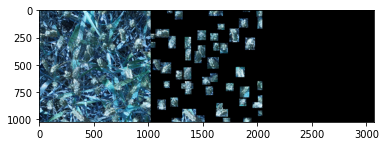

In [40]:
net = autEncD('autEncD'); net.cuda()
net.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/APS360/APS360-2020Summer-Project/saved/TrainingRuns/AutoEncTrainer/autEncD_b64_te10_lr0.001/model_epoch9'))
for img, compImg, _ in trainLoader:
    out = net(img.cuda())

    img = torch.squeeze(img, 0)
    img = torch.transpose(img, 0, 2)
    compImg = torch.squeeze(compImg, 0)
    compImg = torch.transpose(compImg, 0, 2)

    out = torch.squeeze(out, 0)
    out = torch.transpose(out, 0, 2)
    out = out.detach().cpu()

    img.numpy(); compImg.numpy(); out.numpy()

    plt.imshow(np.concatenate((img, compImg, out), 1))
    plt.
    break

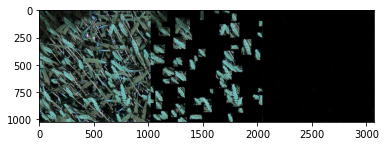

In [42]:
net = autEncE('autEncE'); net.cuda()
net.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/APS360/APS360-2020Summer-Project/saved/TrainingRuns/AutoEncTrainer/autEncE_b64_te10_lr0.001/model_epoch9'))
for img, compImg, _ in trainLoader:
    out = net(img.cuda())

    img = torch.squeeze(img, 0)
    img = torch.transpose(img, 0, 2)
    compImg = torch.squeeze(compImg, 0)
    compImg = torch.transpose(compImg, 0, 2)

    out = torch.squeeze(out, 0)
    out = torch.transpose(out, 0, 2)
    out = out.detach().cpu()

    img.numpy(); compImg.numpy(); out.numpy()

    plt.imshow(np.concatenate((img, compImg, out), 1))
    break